In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../datasets/logreg.csv")
data.sample(frac = 1)
X,Y = data["x1"],data["y"]


In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [54]:
def accuracy(y,predicted):
    return np.sum(y==predicted)/len(predicted)*100

In [55]:
def convert(p):
    t = []
    for i in p:
        if i>0.5:
            t.append(1)
        else:
            t.append(0)
    return t

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(np.array(X).reshape(-1,1),Y)
[[B1]] = model.coef_
[B0] = model.intercept_

In [57]:
hypo = np.dot(B1,X.T) + B0
prediction = sigmoid(hypo)
prediction = convert(prediction)

In [58]:
print(accuracy(prediction,Y))

100.0


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [64]:
p = []
l = []
e = []
for i in range(len(X)):
    instance = X.iloc[i]
    pred = 1/(1+np.exp(-(B0 + B1*instance)))
    loss = round(pred)-Y[i]
    error = pred - Y[i]
    e.append(error)
    p.append(round(pred))
    l.append(loss)
    print(f"For X={instance}, pred={round(pred)}, loss={loss}, predWithRound={pred}, error={error}")


For X=2.781084, pred=0, loss=0, predWithRound=0.09011843087420256, error=0.09011843087420256
For X=1.465489, pred=0, loss=0, predWithRound=0.019369574767893347, error=0.019369574767893347
For X=3.396562, pred=0, loss=0, predWithRound=0.17394784416907869, error=0.17394784416907869
For X=1.38807, pred=0, loss=0, predWithRound=0.01764723237807845, error=0.01764723237807845
For X=3.064072, pred=0, loss=0, predWithRound=0.12288607383137673, error=0.12288607383137673
For X=7.627531, pred=1, loss=0, predWithRound=0.974100253490875, error=-0.025899746509124966
For X=5.332441, pred=1, loss=0, predWithRound=0.6930840238300584, error=-0.3069159761699416
For X=6.922597, pred=1, loss=0, predWithRound=0.9406635985967389, error=-0.05933640140326113
For X=8.675419, pred=1, loss=0, predWithRound=0.9926923584787827, error=-0.007307641521217323
For X=7.673756, pred=1, loss=0, predWithRound=0.9754917334436186, error=-0.024508266556381386


Text(0, 0.5, 'Error')

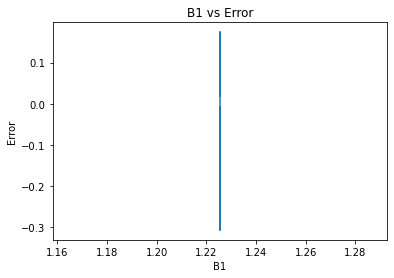

In [68]:
plt.plot([B1]*10, e)
plt.title("B1 vs Error")
plt.xlabel("B1")
plt.ylabel("Error")

In [75]:
from sklearn.metrics import accuracy_score, log_loss
y_pred = model.predict(np.array(X).reshape(-1,1))
y_prob = model.predict_proba(np.array(X).reshape(-1,1))[:,1]
error = log_loss(Y,y_prob)
print(f"Log Error = {error}")

accuracy = accuracy_score(Y, y_pred)
print(f'Accuracy = {accuracy * 100: .2f}%')

Log Error = 0.09401838662906944
Accuracy =  100.00%


/tmp/ipykernel_12652/2201047316.py:2: RuntimeWarning: divide by zero encountered in log
  a = -np.log(lp)
/tmp/ipykernel_12652/2201047316.py:3: RuntimeWarning: divide by zero encountered in log
  b =np.log(1-lp)


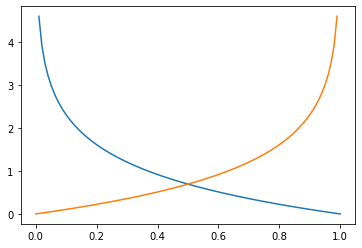

In [96]:
lp = np.linspace(0,1,100)
a = -np.log(lp)
b =np.log(1-lp)
plt.plot(lp,a)
plt.plot(lp,-b)
plt.show()
